<a href="https://colab.research.google.com/github/monkrus/machine_learning_types/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression supervised machine learning model. It is used to predict the survival rate of a passenger on a Titanic ship.

In [2]:
!pip install -q sklearn

  Preparing metadata (setup.py) ... done


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [4]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [6]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
#print(y_train.head)
#print(y_eval.head)

In [7]:
dftrain.head() # loads first 5 items in the dataframe
#y_train.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [8]:
dftrain.describe() # statistical summary

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [9]:
dftrain.shape # tells number of rows and columns


(627, 9)

In [10]:
y_train.head()# loads first 5 items in the dataframe

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<Axes: >

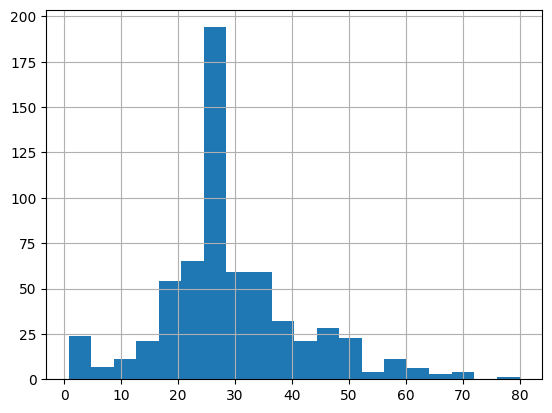

In [11]:
dftrain.age.hist(bins=20)

In [12]:
#dftrain.sex.value_counts().plot(kind='barh')


Text(0.5, 0, '% survive')

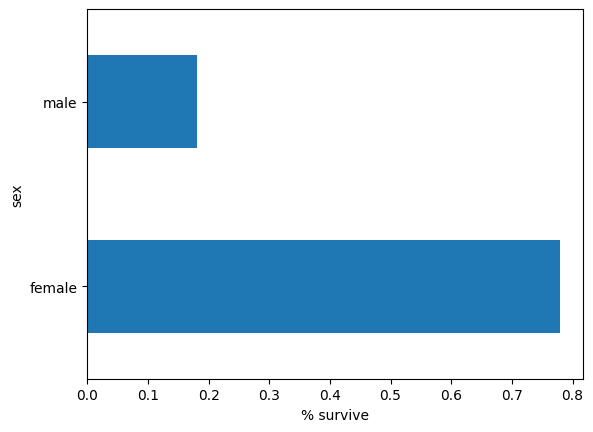

In [13]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')




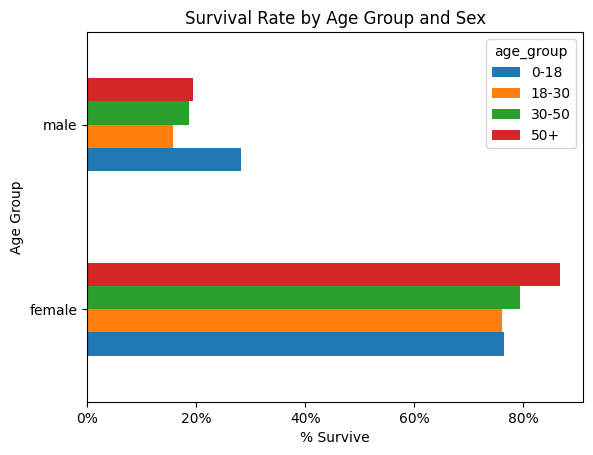

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

# Assuming dftrain is your DataFrame and y_train is the target variable

# Create age groups
bins = [0, 18, 30, 50, 100]  # Define age groups: 0-18, 18-30, 30-50, 50+
labels = ['0-18', '18-30', '30-50', '50+']
dftrain['age_group'] = pd.cut(dftrain['age'], bins=bins, labels=labels, right=False)

# Concatenate DataFrame with y_train and group by sex and age_group to calculate survival rates
survival_rate_by_age_sex = pd.concat([dftrain, y_train], axis=1).groupby(['sex', 'age_group'])['survived'].mean().unstack()

# Plot the survival rates
ax = survival_rate_by_age_sex.plot(kind='barh')
ax.set_xlabel('% Survive')
ax.set_ylabel('Age Group')
ax.set_title('Survival Rate by Age Group and Sex')

# Format y-axis to display percentages
percentages = ['{:,.0%}'.format(x) for x in ax.get_xticks()]
ax.xaxis.set_major_locator(FixedLocator(ax.get_xticks()))
ax.set_xticklabels(percentages)

plt.show()


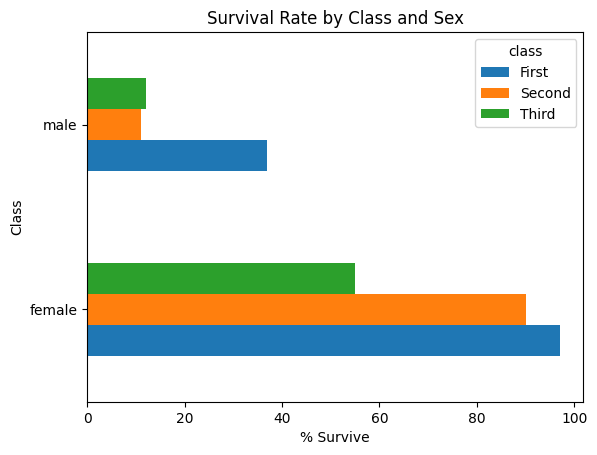

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dftrain is your DataFrame and y_train is the target variable

# Concatenate DataFrame with y_train and group by sex and class to calculate survival rates
survival_rate_by_class_sex = pd.concat([dftrain, y_train], axis=1).groupby(['sex', 'class'])['survived'].mean().unstack()

# Convert survival rates to whole numbers
survival_rate_by_class_sex = (survival_rate_by_class_sex * 100).astype(int)

# Plot the survival rates
ax = survival_rate_by_class_sex.plot(kind='barh')
ax.set_xlabel('% Survive')
ax.set_ylabel('Class')
ax.set_title('Survival Rate by Class and Sex')

plt.show()



In [22]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                      'embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
  print(vocabulary)

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4]
['Third' 'First' 'Second']
['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
['n' 'y']
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg'

In [30]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [28]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimator by passing the feature columns we created earlier

In [29]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.72727275
